1. Given 1000 records in a dataset, 1000 models are trained with 999 records as part of
the training sample and the remaining 1 sample for testing, and the error rate is averaged out,
this validation technique is called? 

c) LOOCV

2.  In k-fold cross validation technique, the value of k being small could lead to which of
the following in relation to the error rate

c) high bias, low variance

3. In k-fold cross validation technique, the value of k being large could lead to which of
the following in relation to the error rate

b) low bias, high variance

4. Explain what regularization is and why it is useful.

Regularization is a technique that fits a model appropriatley on given input variables by shrinking the coefficents towards 0. This is useful because it prevents either overfitting or underfitting, makes the model more robust, and reduces variance.

In [5]:
import boto3
import pandas as pd; pd.set_option('display.max_column', 100)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression

## define bucket in which you are trying to reach
s3 = boto3.resource('s3')
bucket_name = 'daltondencklau-data445-bucket'
bucket = s3.Bucket(bucket_name)


## define csv file to read in the bucket
file_key= 'framingham.csv'

## syntax to allow us to read the file
bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

## reading the data file
heart = pd.read_csv(file_content_stream)
heart.head(100)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,65,3.0,0,0.0,0.0,0,0,0,193.0,123.0,76.5,29.33,60.0,96.0,0
96,0,63,4.0,1,20.0,0.0,0,0,1,239.0,134.0,80.0,26.64,88.0,126.0,0
97,0,40,2.0,0,0.0,0.0,0,0,0,205.0,100.0,60.0,NaN,60.0,72.0,1
98,0,56,1.0,0,0.0,0.0,0,1,0,296.0,180.0,90.0,23.72,75.0,120.0,0


In [6]:
## removing missing variables
heart = heart.dropna()
heart.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [23]:
## defining input and target variables
X = heart.drop(columns = ['TenYearCHD'], axis = 1)
Y = heart['TenYearCHD']

## defining list to store results
md1_results = list()
md2_results = list()

kf = KFold(n_splits = 5, shuffle = True)

for train_idx, val_idx in kf.split(X):

  ## splitting the data into train and validation
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    Y_train, Y_val = Y.iloc[train_idx], Y.iloc[val_idx]
    
    ## defining input variables for model 1
    X1 = X_train[['age', 'currentSmoker', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]
    X_val_1 = X_val[['age', 'currentSmoker', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]
    
    ## defining the input variables for model 2
    X2 = X_train[['age', 'currentSmoker', 'totChol', 'BMI', 'heartRate', 'glucose']]
    X_val_2 = X_val[['age', 'currentSmoker', 'totChol', 'BMI', 'heartRate', 'glucose']]

    ## transforming the data for both models
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    
    X1 = scaler.fit_transform(X1)
    X_val_1 = scaler.fit_transform(X_val_1)
    
    X2 = scaler.fit_transform(X2)
    X_val_2 = scaler.fit_transform(X_val_2)
    
    ## Building the logistic regression model
    md1 = LogisticRegression().fit(X1, Y_train)
    md2 = LogisticRegression().fit(X2, Y_train)
    
    ## Predicting on the validation set
    pred1 = md1.predict_proba(X_val_1)[:,1]
    pred2 = md2.predict_proba(X_val_2)[:,1]
    
    ## setting 25% threshold and creating labels for transformation
    pred1_labels = np.where(pred1 < 0.25, 0, 1)
    pred2_labels = np.where(pred2 < 0.25, 0, 1)
    
    ## calculating f1 score for both models
    md1_f1score = f1_score(Y_val, pred1_labels)
    md2_f1score = f1_score(Y_val, pred2_labels)
    
    ## storing F1 score in a list
    md1_results.append(md1_f1score)
    md2_results.append(md2_f1score)

In [24]:
## printing each interation for both models
print(md1_results)
print(md2_results)

[0.3104693140794224, 0.41040462427745666, 0.36990595611285265, 0.2903225806451613, 0.40549828178694153]
[0.33876221498371334, 0.3609022556390978, 0.3372093023255814, 0.32061068702290074, 0.38174273858921154]


In [25]:
## reporting the average F1 score for both models
print('The average F1 Score for Model 1 is', np.mean(md1_results))
print('The average F1 Score for Model 2 is', np.mean(md2_results))

The average F1 Score for Model 1 is 0.3573201513803669
The average F1 Score for Model 2 is 0.347845439712101


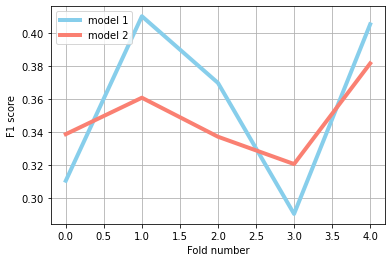

In [26]:
## visualizing f1 scores
plt.plot(md1_results , linewidth = 4, color = 'skyblue')
plt.plot(md2_results , linewidth = 4, color = 'salmon')
plt.xlabel('Fold number')
plt.ylabel('F1 score')
plt.legend(loc = 'upper left', labels = ['model 1', 'model 2'])
plt.grid()
plt.grid
plt.show;

Based on the average F1 scores and the above chart, I would choose model 1 because the average F1 score is closest to 0.